In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters, report_fit

In [8]:
# constants
pi = 3.14159
# variables
mass = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])
sigma_mass = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])
period = np.array([0.60,0.50,0.40,0.30,0.20,0.10,0.70])
sigma_period = np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07])

In [9]:
# calculations
k = 4 * pi**2 * mass / period**2
relative_uncertainty = np.sqrt( (2*sigma_period/period)**2 + (sigma_mass/mass)**2 )
sigma_k = k * relative_uncertainty

In [10]:
# fitting to find k
def linear(x,gradient,b):
    return gradient*x + b

model = Model(linear,independent_vars=['x'])
params = Parameters()
params.add('gradient',value=8,vary=True)
params.add('b',value=0.0001,vary=True)


fit = model.fit(period**2, x= mass, params=params, weights = 2/sigma_period)
slope = np.round(fit.values['gradient'],3)
intercept = np.round(fit.values['b'],3)
print(fit.values)
print(fit.fit_report())

{'gradient': 8.0, 'b': 0.30280556170119316}
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 596.958958
    reduced chi-square = 119.391792
    Akaike info crit   = 35.1215675
    Bayesian info crit = 35.0133878
    R-squared          = -3181.08400
##  Warning: uncertainties could not be estimated:
    gradient:  at initial value
[[Variables]]
    gradient:  8.00000000 (init = 8)
    b:         0.30280556 (init = 0.0001)


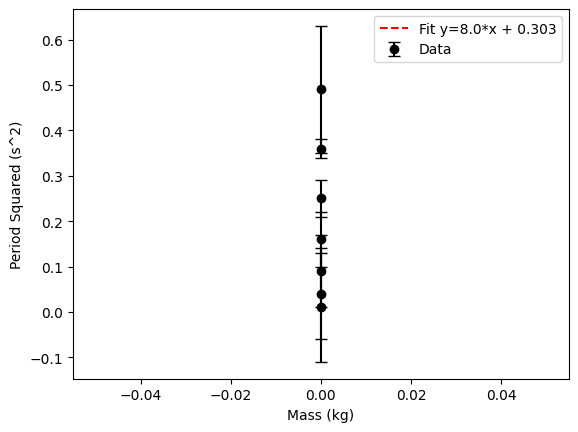

In [11]:
# plotting
plt.errorbar(mass, period**2, yerr=2*sigma_period, fmt='ko', capsize=4, label='Data')
plt.plot(mass,linear(mass,slope,intercept),'--r',label='Fit y='+str(slope)+'*x + '+str(intercept))
plt.xlabel('Mass (kg)')
plt.ylabel('Period Squared (s^2)')
plt.legend()